In [215]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from scipy import signal
import scipy.fftpack as fftpack
from scipy.fftpack import fftfreq
import matplotlib.pyplot as plt
import os
from scipy.signal import blackman
from tifffile import imread
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.fftpack import fft
from matplotlib.colors import LogNorm
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible

In [216]:
targetdir = '/Users/aimachine/Documents/JLMCurvature/FFTImageTest/'
sourceimage = '/Users/aimachine/Documents/JLMCurvature/FFTImageTest/FullResolution.tif'

base = os.path.split(sourceimage)[-1]

Filename = os.path.splitext(base)


In [217]:
#Enter time unit in seconds
Time_unit = 5
#Cut Section of image before the alst pixel
CutSectionAfter = 0
#Enter start y pixel unit for the section
StartSection = 0
#Enter end y pixel unit for section
EndSection = 600
#Range of Plot in Hertz
maxXrange = 0.1

745   122
1


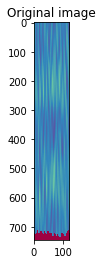

In [218]:
y = imread(sourceimage)
Xrange = y.shape[0]
Yrange = y.shape[1]
cutY = y[:,CutSectionAfter:Yrange]
y = cutY
plt.figure()
plt.imshow(y, plt.cm.Spectral)
plt.title('Original image')

print(Xrange, " ", Yrange)
width = int(EndSection - StartSection)
block = int(Xrange / width)

Start = StartSection
End = EndSection
print(block)
axes = 'XY'

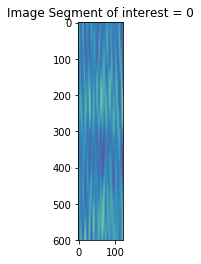

In [219]:
for i in range(block):
 plt.figure()
 
 fsmally = y[StartSection:EndSection, :]
 StartSection = EndSection
 EndSection += width
    
 plt.imshow(fsmally, plt.cm.Spectral)
 plt.title('Image Segment of interest' + ' = ' + str(i))

In [220]:
#We want the phase of the block
def doFilterFFT(image, block, filter):
   addedfft = 0 
   addedphase = 0
   Phase = image 
   PointsSample = image.shape[1] 
   for i in range(image.shape[0]):
      if filter == True:   
       w = blackman(PointsSample)
      if filter == False:
       w = 1
      strip = image[i,:]
      fftresult = fft(w * strip)
      phase = np.angle(fftresult)
      Phase[i,:] = phase  
      addedfft += np.abs(fftresult)
      addedphase += phase
   xf = fftfreq(PointsSample, Time_unit)
   
   
   return 2.0/PointsSample * addedfft[1:int(PointsSample//2)], xf[1:int(PointsSample//2)] , Phase

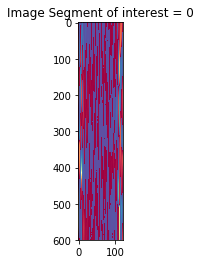

In [221]:
StartSection = Start
EndSection = End
allfrequ = 0


startblock = 0;
endblock = 1;
 
for i in range(block):
      plt.figure()
   
 
      fsmally = y[StartSection:EndSection, :]

      onedimg, frequ, phase = doFilterFFT(fsmally, i, False)
      
      plt.imshow(phase, plt.cm.Spectral)
      plt.title('Image Segment of interest' + ' = ' + str(i))
      save_tiff_imagej_compatible((targetdir + 'PhaseSegment' + str(i) + Filename[0]) , phase, axes)
      StartSection = EndSection
      EndSection += width
       
      
        
StartSection = Start
EndSection = End
